In [ ]:
#케라스로 RNN구현하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model=Sequential()
model.add(SimpleRNN(7,input_shape=(2,10)))
#model.add(SimpleRNN(3,input_length=2,input_dim=10))과 동일
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 7)                 126       
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#batch size 미리 정의 , 2D 텐서
model=Sequential()
model.add(SimpleRNN(7,batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 7)                    126       
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#return_sequences 매개변수에 True를 기재하여 출력 값으로 3D텐서 리턴
model=Sequential()
model.add(SimpleRNN(7,batch_input_shape=(8,2,10),return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 7)                 126       
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# #파이썬으로 RNN 구현하기
# #numpy로 RNN층으로 구현

# hidden_state_t=0 #초기 은닉 상태를 0(벡터)로 초기화
# for input_t in input_length: #각 시점마다 입력을 받는다.
#     output_t = tanh(input_t, hidden_state_t) #각 시점에 대해서 입력과 은닉 상태를 가지고 연산
#     hidden_state_t=output_t #계산 결과는 현재 시점의 은닉 상태가 된다.

In [ ]:
#RNN층 구현 _실제 동작되는 코드로
#2D 텐서로 입력, but 실제로는 3D텐서로 입력받는다!!!

import numpy as np
timesteps=10
input_dim=4
hidden_units=8

#입력에 해당되는 2D 텐서
inputs=np.random.random((timesteps,input_dim))

#초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,))

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
Wx=np.random.random((hidden_units,input_dim)) #(8,4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh=np.random.random((hidden_units,hidden_units)) #(8,8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b=np.random.random((hidden_units,)) #(8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [ ]:
#Wx (은닉 상태의 크기 x 입력의 차원)
#Wh (은닉 상태의 크기 x 은닉 상태의 크기)
#b (은닉 상태의 크기)

total_hidden_states=[]

#각 시점 별 입력값.
for input_t in inputs:

    #Wx * Wh * Ht-1 + b(bias)
    output_t = np.tanh(np.dot(Wx,input_t)+np.dot(Wh,hidden_state_t)+b)

    #각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
    #각 시점의 은닉 상태의 값을 계속해서 누적
    total_hidden_states.append(list(output_t))
    hidden_state_t = output_t

#출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states=np.stack(total_hidden_states, axis=0)

#(timesteps, output_dim)
print('모든 시점의 은닉 상태 : ')
print(total_hidden_states)


모든 시점의 은닉 상태 : 
[[0.97215156 0.9841429  0.95762207 0.98575696 0.94091572 0.93712996
  0.96876123 0.94904748]
 [0.99996367 0.9999798  0.99997533 0.99998005 0.999953   0.99953153
  0.99995133 0.99998052]
 [0.99997229 0.99998857 0.99998927 0.9999872  0.99996717 0.99965609
  0.99996818 0.99998627]
 [0.99999285 0.99999054 0.9999906  0.99999693 0.9999561  0.99976855
  0.99998452 0.99999656]
 [0.99996142 0.99997633 0.99997914 0.9999769  0.99993968 0.99938867
  0.99995105 0.99998062]
 [0.99997398 0.99997169 0.99997314 0.99998432 0.999919   0.99942362
  0.99995707 0.99998719]
 [0.99999122 0.99999493 0.99999199 0.9999941  0.99998562 0.99965262
  0.99998406 0.99999478]
 [0.99998891 0.99998879 0.9999891  0.99999528 0.99995468 0.99974428
  0.99997996 0.99999472]
 [0.99996015 0.99996657 0.99997809 0.99995918 0.99991431 0.99841715
  0.99993856 0.99997755]
 [0.99998072 0.99998152 0.99998381 0.99999015 0.9999371  0.99958517
  0.99996851 0.99999069]]


In [ ]:
model=Sequential()
model.add(SimpleRNN(hidden_units,input_length=10,input_dim=5,return_sequences=True))
model.add(SimpleRNN(hidden_units,return_sequences=True))

In [ ]:
#양방향RNN 구현
from tensorflow.keras.layers import Bidirectional

timesteps=10
input_dim=5

model=Sequential()

model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True),
                        input_shape=(timesteps,input_dim)))

In [ ]:
#은닉층이 4개인 경우
model=Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True),input_shape=(timesteps,input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units,return_sequences=True)))

In [ ]:
#케라스의 SimpleRNN과 LSTM이해하기
#임의의 입력 생성하기
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [ ]:
#단어 벡터의 차원 = 5, 문장의 길이가 4인 경우 가정
#4번의 timesteps 존재
#각 시점마다 5차원의 단어 벡터가 입력으로 사용됨
#RNN ->3D 텐서
#배치크기 1 (여기서는 샘플이 1개이므로 batch_size =1)
#입력 데이터
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)



(1, 4, 5)


In [ ]:
#SimpleRNN이해하기
#return_sequences & return_state
#기본값 = False
rnn = SimpleRNN(3)
#rnn=SimpleRNN(3,return_sequences=False,return_state=Flase)와 동일
hidden_state=rnn(train_X)

print('hidden state:{}, shape:{}'.format(hidden_state, hidden_state.shape))

hidden state:[[-0.5639982   0.8801311  -0.71509427]], shape:(1, 3)


In [ ]:
#return_sequences = True로 지정하여 모든 시점의 은닉상태 출력
rnn=SimpleRNN(3,return_sequences=True)
hidden_states=rnn(train_X)

print('hidden states : {}, shape:{}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.9995812  -0.6333409  -0.9983529 ]
  [-0.999748    0.78892857 -0.70984095]
  [-0.9989706  -0.25064808 -0.8053357 ]
  [-0.99709404 -0.8410254  -0.4736368 ]]], shape:(1, 4, 3)


In [ ]:
#return_sequences만 True인 경우 : 마지막 시점의 은닉상태만 출력
#return_sequences = True, return_state=Truen => SimpleRNN : 두개의 출력을 리턴

rnn = SimpleRNN(3, return_sequences=True,return_state=True)
hidden_states, last_state=rnn(train_X)

print('hidden state: {},shape{}'.format(hidden_states,hidden_states.shape))
print('Last hidden state:{},shape{}'.format(last_state,last_state.shape))

hidden state: [[[-0.9320836   0.9716166   0.9898222 ]
  [ 0.16015136  0.9776749   0.9991785 ]
  [-0.49151608  0.82457256  0.8540446 ]
  [-0.6513351   0.7596812   0.99759364]]],shape(1, 4, 3)
Last hidden state:[[-0.6513351   0.7596812   0.99759364]],shape(1, 3)


In [ ]:
#return_sequences = False & return_state = True 인 경우
#두 개의 출력 모두 마지막 시점 은닉 상태를 출력함
rnn=SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state,last_state=rnn(train_X)

print('hidden state:{},shape:{}'.format(hidden_state, hidden_state.shape))
print('last hidden state:{},shape:{}'.format(last_state,last_state.shape))

hidden state:[[0.48085728 0.9977982  0.73590136]],shape:(1, 3)
last hidden state:[[0.48085728 0.9977982  0.73590136]],shape:(1, 3)


In [ ]:
###LSTM 이해하기
#return_sequences = False & return_state=True인 경우
lstm=LSTM(3,return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state=lstm(train_X)

print('hidden state: {},shape:{}'.format(hidden_state, hidden_state.shape))
print('last state:{},shape:{}'.format(last_state, last_state.shape))
print('last cell state:{},shape{}'.format(last_cell_state,last_cell_state.shape))

hidden state: [[-0.2970912   0.10015458 -0.51643306]],shape:(1, 3)
last state:[[-0.2970912   0.10015458 -0.51643306]],shape:(1, 3)
last cell state:[[-0.3970523  0.6424023 -1.2355304]],shape(1, 3)


In [ ]:
#return_sequences=True, return_state=True인 경우
lstm=LSTM(3,return_sequences=True, return_state=True)
hidden_state, last_state, last_cell_state=lstm(train_X)

print('hidden state: {},shape:{}'.format(hidden_state, hidden_state.shape))
print('last state:{},shape:{}'.format(last_state, last_state.shape))
print('last cell state:{},shape{}'.format(last_cell_state,last_cell_state.shape))

hidden state: [[[-0.13920961  0.05624186 -0.11863286]
  [-0.14408338  0.3121308  -0.20529094]
  [ 0.07034603  0.30131596 -0.21186043]
  [-0.11060808  0.3535355  -0.2915823 ]]],shape:(1, 4, 3)
last state:[[-0.11060808  0.3535355  -0.2915823 ]],shape:(1, 3)
last cell state:[[-0.14760196  0.98515725 -0.77278924]],shape(1, 3)


In [ ]:
#Bidirectional LSTM (양방향)
#은닉상태 고정

k_init=tf.keras.initializers.Constant(value=0.1)
b_init=tf.keras.initializers.Constant(value=0)
r_init=tf.keras.initializers.Constant(value=0.1)

In [ ]:
bilstm=Bidirectional(LSTM(3,return_sequences=False,return_state=True,\
                         kernel_initializer=k_init, bias_initializer=b_init,
                         recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states:{},shape:{}'.format(hidden_states, hidden_states.shape))
print('forward state:{},shape:{}'.format(forward_h,forward_h.shape))
print('backward state:{},shape:{}'.format(backward_h,backward_h.shape))

hidden states:[[0.6303139  0.6303139  0.6303139  0.70387346 0.70387346 0.70387346]],shape:(1, 6)
forward state:[[0.6303139 0.6303139 0.6303139]],shape:(1, 3)
backward state:[[0.70387346 0.70387346 0.70387346]],shape:(1, 3)


In [ ]:
bilstm=Bidirectional(LSTM(3,return_sequences=True,return_state=True,\
                         kernel_initializer=k_init, bias_initializer=b_init,
                         recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states:{},shape:{}'.format(hidden_states, hidden_states.shape))
print('forward state:{},shape:{}'.format(forward_h,forward_h.shape))
print('backward state:{},shape:{}'.format(backward_h,backward_h.shape))

hidden states:[[[0.35906476 0.35906476 0.35906476 0.70387346 0.70387346 0.70387346]
  [0.5511133  0.5511133  0.5511133  0.5886358  0.5886358  0.5886358 ]
  [0.5911575  0.5911575  0.5911575  0.39516988 0.39516988 0.39516988]
  [0.6303139  0.6303139  0.6303139  0.2194224  0.2194224  0.2194224 ]]],shape:(1, 4, 6)
forward state:[[0.6303139 0.6303139 0.6303139]],shape:(1, 3)
backward state:[[0.70387346 0.70387346 0.70387346]],shape:(1, 3)


In [ ]:
#RNN을 이용하여 텍스트 생성하기
#1. 데이터에 대한 이해와 전처리
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

#예제
text= """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와와 오는 말이 곱다\n"""

#크기확인.
#단어 집합의 크기를 저장할 때, 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만 패딩을 위한 0을 고려하여 +1해주기.
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size=len(tokenizer.word_index) +1
print('단어 집합의 크기: %d' % vocab_size)



단어 집합의 크기: 12


In [ ]:
#각 단어와 단어에 부여된 정수 인덱스 출력
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와와': 9, '오는': 10, '곱다': 11}


In [ ]:
#훈련 데이터 만들기
sequences = list()
for line in text.split('\n'): #줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print('학습에 사용할 샘플의 개수 : %d' % len(sequences))

학습에 사용할 샘플의 개수 : 11


In [ ]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [ ]:
#모든 샘플의 길이 일치 시켜주기

#모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
max_len=max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [ ]:
#가장 긴 샘플의 길이 = 6
#전체 샘플의 길이를 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len,padding='pre')

In [ ]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [ ]:
#각 샘플의 마지막 단어를 레이블로 분리 -> by numpy
#X : 리스트의 마지막 값을 제외하고 저장한 것
#y : 리스트의 마지막 값만 저장한것 <- 레이블 데이터
#결국 우리가 예측해야하는 것은 각 리스트의 마지막 단어이므로 분리과정을 실행

sequences=np.array(sequences)
X=sequences[:,:-1]
y=sequences[:,-1]

print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [ ]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [ ]:
#RNN모델에 훈련 데이터를 훈련시키기 전에 레이블에 대해 원-핫 인코딩 수행
y=to_categorical(y,num_classes=vocab_size)

In [ ]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
#모델설계하기
#RNN 모델에 데이터를 훈련시키기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

#하이퍼파라미터 설정
#벡터의 차원 = 10, 은닉 상태의 크기 = 32
#다대일 구조의 RNN 사용
#전결합층을 출력으로 단어 집합 크기만큼의 뉴런을 배치하여 모델 설계
#다중클래스 모델 -> 소프트맥스 회귀 , 손실함수 -> 크로스 엔트로피 함수 , epochs = 200
embedding_dim =10
hidden_units=32

model=Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X,y,epochs=200, verbose=2)


Epoch 1/200
1/1 - 3s - loss: 2.4840 - accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 2/200
1/1 - 0s - loss: 2.4715 - accuracy: 0.1818 - 19ms/epoch - 19ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4592 - accuracy: 0.1818 - 18ms/epoch - 18ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4469 - accuracy: 0.3636 - 18ms/epoch - 18ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4345 - accuracy: 0.4545 - 19ms/epoch - 19ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4219 - accuracy: 0.4545 - 13ms/epoch - 13ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4092 - accuracy: 0.5455 - 20ms/epoch - 20ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3960 - accuracy: 0.5455 - 17ms/epoch - 17ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3825 - accuracy: 0.6364 - 21ms/epoch - 21ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3685 - accuracy: 0.6364 - 17ms/epoch - 17ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3539 - accuracy: 0.5455 - 17ms/epoch - 17ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3388 - accuracy: 0.5455 - 17ms/epoch - 17ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3229 

In [ ]:
#모델이 정확하게 예측하고 있는지 문장을 생성하는 함수를 만들어서 출력해보기
def sentence_generation(model, tokenizer, current_word,n): #모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    #n번 반복
    for _ in range(n):
        #현재 단어에 대한 정수 인코딩과 패딩
        encoded=tokenizer.texts_to_sequences([current_word])[0]
        encoded=pad_sequences([encoded],maxlen=5,padding='pre')

        #입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장
        result=model.predict(encoded, verbose=0)
        result=np.argmax(result,axis=1)

        for word, index in tokenizer.word_index.items():
            #만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
              break

        #현재 단어 + '  ' + 예측 단어를 현재 단어로 변경
        current_word=current_word+' '+word

        #예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence


In [ ]:
#'경마장에'라는 단어 뒤에는 총 4개의 단어가 있으므로 4번 예측해보자
print(sentence_generation(model,tokenizer,'경마장에',4))

경마장에 있는 말이 뛰고 있다


In [ ]:
print(sentence_generation(model,tokenizer,'그의',2))

그의 말이 법이다


In [ ]:
print(sentence_generation(model,tokenizer,'가는',5))

가는 말이 고와와 오는 말이 곱다


In [ ]:
##LSTM을 이용하여 텍스트 생성하기
#데이터에 대한 이해와 전처리
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
#다운로드한 훈련 데이터를 데이터 프레임에 저장
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
print('열의 개수:',len(df.columns))
print(df.columns)

In [ ]:
#사용할 열 = headline (제목)
#Null값이 있는지 확인
print(df['headline'].isnull().values.any())
print(df['headline'].isnull().sum())

In [ ]:
#headline열에서 모든 신문 기사의 제목을 뽑아 하나의 리스트로 저장
headline=[]
#헤드라인의 값들을 리스트로 저장
headline.extend(list(df.headline.values))
headline[:5]

In [ ]:
#Unknown<- 노이즈 데이터 제고
#제거 전 샘플의 개수 확인
#제거 전, 후의 샘플의 개수 비교
print('총 샘플의 개수 :{}'.format(len(headline)))

In [ ]:
#Unknown 값을 가진 샘플 제거
headline=[word for word in headline if word != "Unknown"]
print('노이즈 값 제고 후 샘플의 개수 :{}'.format(len(headline)))

In [ ]:
headline[:5]

In [ ]:
#전처리 과정2
#구두점 제거와 단어의 소문자화

def repreprocessing(raw_sentence):
    preprocessed_sentence=raw_sentence.encode('utf8').decode('ascii','ignore')
    #구두점 동시에 소문자화
    return ''.join(word for word in preprocessed_sentence if word not in punctuation).lower()

preprocessed_headline=[repreprocessing(x) for x in headline]
preprocessed_headline[:5]

In [ ]:
#단어 집합을 만들고 크기 확인
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size=len(tokenizer.word_index)+1
print('단어 집합의 크기 :%d' % vocab_size)

In [ ]:
#정수 인코딩 진행 & 하나의 문장을 여러 줄로 분해하여 훈련 데이터 구성
sequences=list()

for sentence in preprocessed_headline:

    #각 샘플에 대한 정수 인코딩
    encoded=tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(encoded)):
      sequence=encoded[:i+1]
      sequences.append(sequence)

sequences[:11]

In [ ]:
#어떤 정수가 어떤 단어를 의미하는지 알아보기 위해서 인덱스로부터 단어를 찾는 indes_to_word만들기
index_to_word={}
for key, value in tokenizer.word_index.items(): #인덱스를 단어로 바꾸기 위해 index_to_word 생성
    index_to_word[value]=key

print('빈도수 상위 582번 단어:{}'.format(index_to_word[582]))
print('빈도수 상위 582번 단어:{}'.format(index_to_word[58]))

In [ ]:
#padding 작업
#가장 긴 샘플의 길이 확인
max_len=max(len(l) for l in sequences)
print('샘플의 최대 길이: {}'.format(max_len))

In [ ]:
#최대길이 24로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

In [ ]:
#맨 우측 단어만 레이블로 분리해주는 작업
sequences=np.array(sequences)
X=sequences[:,:-1]
y=sequences[:,-1]

print(X[:3])
print(y[:3])

In [ ]:
#레이블 데이터 y에 대해서 원-핫 인코딩 수행
y=to_categorical(y,num_classes=vocab_size)

In [ ]:
#모델 설계하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,LSTM

In [ ]:
#하이퍼파리미터 설정
#임베딩 벡터 차원 = 10
#은닉 상태의 크기 = 128
#다 대 일 구조, 전결합층을 출력층으로 단어 집합 크기만큼 뉴런을 배치하여 모델 설계
#다중클래스 분류 문제 -> 소프트맥스 회귀, 손실함수 -> 크로스 엔트로피 함수
#에포크 200

embedding_dim=10
hidden_units=128

model=Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,y,epochs=200,verbose=2)

In [ ]:
#문장을 생성하는 함수 sentence_generation을 만들어 문장 생성
def sentence_generation (model,tokenizer,current_word,n): #모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word=current_word

    sentence=''

    #n번 반복
    for _ in range(n):
        encoded=tokenizer.texts_to_sequences([current_word])[0]
        encoded=pad_sequences([encoded],maxlen=max_len-1,padding='pre')

        result=model.predict(encoded,verbose=0)
        result=np.argmax(result,axis=1)

        for word, index in tokenizer.word_index.items():
            #만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        #현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' ' + word
        # 예측 단어를 문장에 저장
        sentence =sentence + ' '+word

    sentence=init_word+sentence
    return sentence


In [ ]:
#임의의 단어 i에 대해서 10개의 단어 추가 생성 해보기
print(sentence_generation(model,tokenizer,'i',10))

In [ ]:
#how에 대해서 10개의 단어 추가 생성
print(sentence_generation(model,tokenizer,'how',10))

In [ ]:
##문자 단위 RNN 언어 모델 (Char RNNLM)
#데이터에 대한 이해와 전처리
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [ ]:
sentences[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [ ]:
#리스트의 원소는 문자열로 구성, 의미있게 문장 토큰화가 된 상태는 X
#이를 하나의 문자열로 통합
total_data=' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d'%len(total_data))

문자열의 길이 또는 총 문자의 개수: 159484


In [ ]:
print(total_data[:200])

the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with


In [ ]:
#문자 집합 생성
char_vocab=sorted(list(set(total_data)))
vocab_size=len(char_vocab)
print('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 56


In [ ]:
#문자 집합의 크기는 매우 작음.
#-> 모든 영어 단어는 총 52개의 알파벳으로 표현 가능하므로.
#방대한 양의 텍스트 -> 집합의 크기를 적게 -> 구현과 테스트 쉽게 가능 ! (장점)

#문자 집합의 각 문자에 정수를 부여하고 출력
#문자에 고유한 정수 부여
char_to_index=dict((char,index) for index, char in enumerate(char_vocab))
print('문자집합:',char_to_index)

문자집합: {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


In [ ]:
#정수로 부터 문자를 리턴하는 index_to_char 생성
index_to_char={}
for key, value in char_to_index.items():
  index_to_char[value]=key

In [ ]:
#훈련 데이터 구성
#apple이라는 시퀀스, 입력의 길이 4
#데이터 구성
#입력 시퀀스, 출력 시퀀스 길이 모두 4
#RNN은 총 네 번의 시점을 가질 수 있음.
#apple은 다섯글자 이지만 입력의 길이는 4이므로 appl까지 입력 가능.
#언어 모델은 다음 시점의 입력을 예측해야하는 모델이므로 pple을 예측하도록 데이서 구성

#appl (입력) -> pple (예측)
train_X = 'appl'
train_y = 'pple'

#데이터를 만드는 방법
#1. 문장 샘플의 길이 정하기
#2. 해당 길이만큼 문자열 전체를 등분

seq_length=60

#전처리 후 생겨날 샘플 수
n_samples=int(np.floor((len(total_data)-1) / seq_length))
print('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2658


In [ ]:
#전처리 진행
train_X = []
train_y = []

for i in range(n_samples):
  #0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick
  X_sample = total_data[i*seq_length:(i+1) * seq_length]

  #정수 인코딩
  X_encoded = [char_to_index[c] for c in X_sample]
  train_X.append(X_encoded)

  #오른쪽으로 1칸 쉬프트
  y_sample = total_data[i*seq_length +1:(i+1)*seq_length+1]

  y_encoded = [char_to_index[c] for c in y_sample]
  train_y.append(y_encoded)

In [ ]:
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])


X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e',

In [ ]:
print(train_X[1])

[43, 33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54]


In [ ]:
print(train_y[1])

[33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54, 52]


In [ ]:
#원-핫 인코딩 수행
#문자단위 RN에서는 입력 시퀀스에 대해서 워드 임베딩 진행 X -> 임베딩층 사용 X

train_X=to_categorical(train_X)
train_y=to_categorical(train_y)

print('train_X의 크기 (shape):{}'.format(train_X.shape))
print('train_y의 크기 (shape):{}'.format(train_y.shape))

train_X의 크기 (shape):(2658, 60, 56, 2)
train_y의 크기 (shape):(2658, 60, 56, 2)


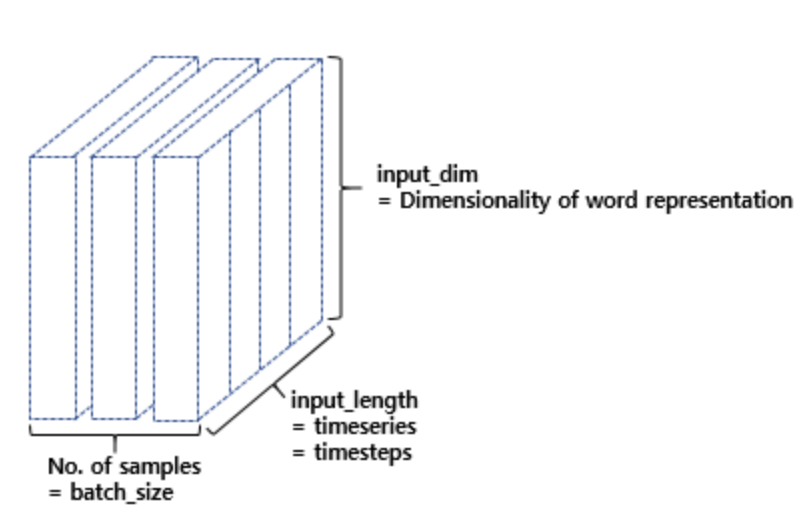

In [ ]:
#모델 설계 -> 모든 시점에서 가능한 모든 문자 중 하나의 문자를 예측하는 다중 클래스 분류 문제를 수행
#하이퍼파라미터 설정
#은닉 상태 크기 = 256
#다 대 다 구조의 LSTM, LSTM 은닉층 2개
#전결합층을 출력층으로 문자 크기 만큼의 뉴런을 배치하여 모델 설계
#출력층 활성화 함수 : 소프트맥스
#손실 함수 : 크로스 엔트로피 함수
#epoch = 80

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

hidden_units =256 #은닉층 개수

model=Sequential()
model.add(LSTM(hidden_units,input_shape=(None, train_X.shape[2]),return_sequences=True)) #첫번째 은닉층
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuray'])
model.fit(train_X,train_y,epochs=80,verbose=2)


Epoch 1/80


ValueError: ignored

In [ ]:
#특정 문자를 주면 다음 문자를 계속해서 생성해내는 sentence_generation함수 구현

In [ ]:
#문자 단위 RNN(Char RNN)으로 텍스트 생성하기
#다대일 구조의 RNN을 문자 단위로 학습시키고, 텍스트 생성해보기

#데이터에 대한 이해와 전처리
import numpy as np
from tensorflow.keras.utils import to_categorical

raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

#단락 구분 없애고 하나의 문자열로 재저장
tokens=raw_text.split()
raw_text=' '.join(tokens)
print(raw_text)


I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [ ]:
#중복을 제거한 문자 집합 생성
char_vocab=sorted(list(set(raw_text)))
vocab_size=len(char_vocab)
print('문자집합:',char_vocab)
print('문자 집합의 크기: {}'.format(vocab_size))

문자집합: [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기: 33


In [ ]:
char_to_index=dict((char,index) for index, char in enumerate(char_vocab)) #문자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [ ]:
#입력 시퀀스 길이가 10이 되도록 데이터 구성
#예측 대상인 문자도 필요하므로 결과적으로 길이가 11이 되도록 데이터 구성

length=11
sequences=[]
for i in range(length,len(raw_text)):
  seq=raw_text[i-length:i] #길이 11의 문자열을 지속적으로 만든다.
  sequences.append(seq)
print('총 훈련 샘플의 수 : %d' % len(sequences))

총 훈련 샘플의 수 : 426


In [ ]:
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [ ]:
sequences[30:45]

['mmer, I lik',
 'mer, I like',
 'er, I like ',
 'r, I like t',
 ', I like to',
 ' I like to ',
 'I like to c',
 ' like to co',
 'like to con',
 'ike to cont',
 'ke to conte',
 'e to contem',
 ' to contemp',
 'to contempl',
 'o contempla']

In [ ]:
#정수 인코딩 수행
encoded_sequences=[]
for sequence in sequences: #전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence =[char_to_index[char] for char in sequence] #문장 샘플에서 각 문자에 대해 정수 인코딩 수행.
    encoded_sequences.append(encoded_sequence)

In [ ]:
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [ ]:
#예측 대상인 문자를 분리시켜주는 작업
#마지막 문자를 분리하여 마지막 문자가 분리된 샘플 -> X_data에 저장
#마지막 문자 (레이블 데이터) -> y_data에 저장
encoded_sequences=np.array(encoded_sequences)

#맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
#맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

In [ ]:
print(X_data[:5])
print(y_data[:5])

[[ 8  0 16 14 28  0 24 23  0 31]
 [ 0 16 14 28  0 24 23  0 31 18]
 [16 14 28  0 24 23  0 31 18 28]
 [14 28  0 24 23  0 31 18 28 17]
 [28  0 24 23  0 31 18 28 17  0]]
[18 28 17  0 21]


In [ ]:
#원- 핫 인코딩 수행
X_data_one_hot=[to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot=np.array(X_data_one_hot)
y_data_one_hot=to_categorical(y_data,num_classes=vocab_size)

In [ ]:
print(X_data_one_hot.shape)
#샘플의 수 batch_size = 426, 입력 시퀀스 길이 = 10,  각 벡터의 차원 33
#원-핫 벡터의 차원은 문자 집합의 크기인 33이어야 하므로 X에 대해 원-핫 인코딩 수행됨을 알 수 있음

(426, 10, 33)


In [ ]:
#모델 설계-> 다중 클래스 분류 문제
#하이퍼파라미터 설정
#은닉 상태의 크기 64
#모델 -> 다대일 구조의 LSTM
#출력층 활성화 함수 : 소프트 맥스, 손실함수 : 크로스 엔트로피 함수
#epoch = 100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

hidden_units =64

model=Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1],X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_data_one_hot,y_data_one_hot,epochs=100,verbose=2)

Epoch 1/100
14/14 - 3s - loss: 3.4740 - accuracy: 0.0798 - 3s/epoch - 230ms/step
Epoch 2/100
14/14 - 0s - loss: 3.3655 - accuracy: 0.1972 - 60ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 3.1200 - accuracy: 0.1972 - 84ms/epoch - 6ms/step
Epoch 4/100
14/14 - 0s - loss: 2.9984 - accuracy: 0.1972 - 94ms/epoch - 7ms/step
Epoch 5/100
14/14 - 0s - loss: 2.9645 - accuracy: 0.1972 - 79ms/epoch - 6ms/step
Epoch 6/100
14/14 - 0s - loss: 2.9399 - accuracy: 0.1972 - 84ms/epoch - 6ms/step
Epoch 7/100
14/14 - 0s - loss: 2.9245 - accuracy: 0.1972 - 83ms/epoch - 6ms/step
Epoch 8/100
14/14 - 0s - loss: 2.9141 - accuracy: 0.1972 - 81ms/epoch - 6ms/step
Epoch 9/100
14/14 - 0s - loss: 2.8919 - accuracy: 0.1972 - 76ms/epoch - 5ms/step
Epoch 10/100
14/14 - 0s - loss: 2.8884 - accuracy: 0.1972 - 76ms/epoch - 5ms/step
Epoch 11/100
14/14 - 0s - loss: 2.8422 - accuracy: 0.1972 - 80ms/epoch - 6ms/step
Epoch 12/100
14/14 - 0s - loss: 2.8133 - accuracy: 0.1972 - 81ms/epoch - 6ms/step
Epoch 13/100
14/14 - 0s -

In [ ]:
#문장을 생성하는 함수를 만들어 문장 생성
#문자열을 입력하면, 해당 문자열로부터 다음문자를 예측하는 것을 반복하여 최종적으로 문장을 완성함.

def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    #초기 시퀀스
    init_text = seed_text
    sentence=''

    #다음 문자 예측은 총 n번만 반복
    for _ in range(n):
      encoded = [char_to_index[char] for char in seed_text] #현재 시퀀스에 대한 정수 인코딩
      encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') #데이터에 대한 패딩
      encoded = to_categorical(encoded, num_classes=len(char_to_index))

      #입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y를 result에 저장
      result = model.predict(encoded, verbose=0)
      result = np.argmax(result,axis=1) #최대값 저장

      for char, index in char_to_index.items():
          if index == result:
              break

      #현재 시퀀스 + 예측 문자 = 현재 시퀀스로 변경
      seed_text = seed_text + char
      #예측 문자를 문장에 저장
      sentence = sentence + char

    #n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence


In [ ]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with life as a programmer, I like to han bout laeer .. BBut jus Iliht  bogr stut 
